  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       '

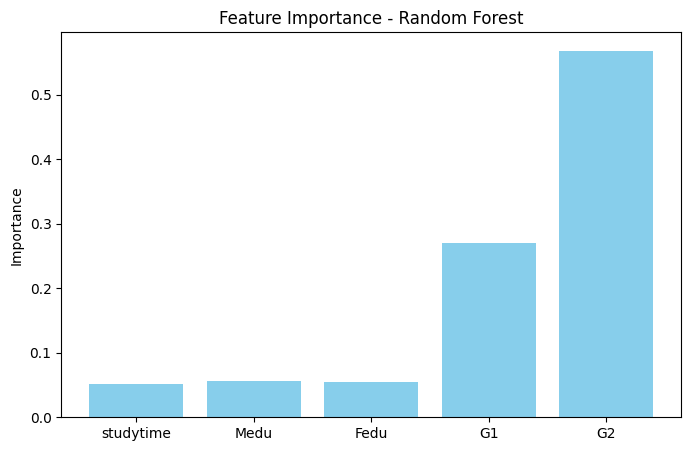

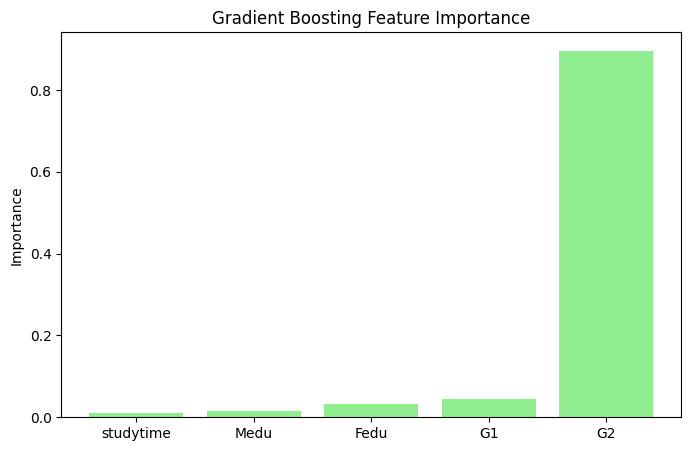

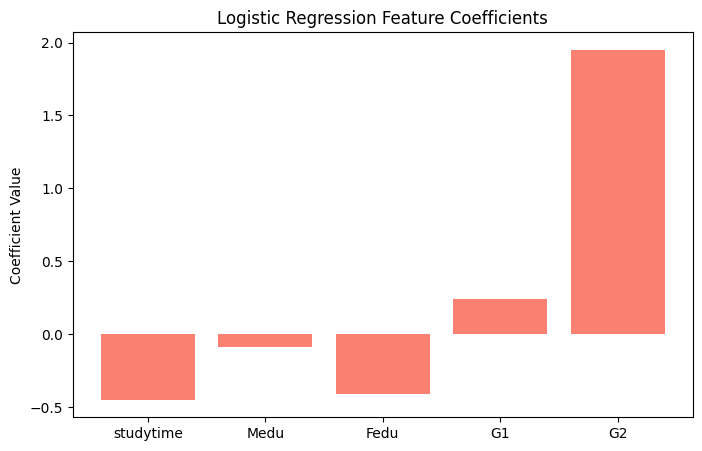

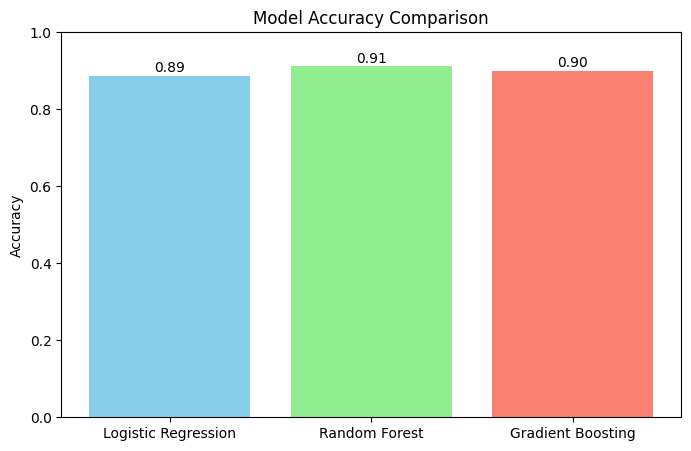

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("/kaggle/input/comparisonofmodels/student/student-mat.csv",sep=";")
print(data.head())
print(data.columns) 
data.columns = [c.strip() for c in data.columns]

data['pass'] = (data['G3'] >= 10).astype(int)

features =['studytime','Medu','Fedu','G1','G2']
X = data[features]
y = data['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

rf = models["Random Forest"]
rf_importances = rf.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(features, importances, color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

gb = models["Gradient Boosting"]
gb_importances = gb.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(features, gb_importances, color='lightgreen')
plt.title("Gradient Boosting Feature Importance")
plt.ylabel("Importance")
plt.show()

lr = models["Logistic Regression"]
lr_coef = lr.coef_[0]
plt.figure(figsize=(8,5))
plt.bar(features, lr_coef, color='salmon')
plt.title("Logistic Regression Feature Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)  
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

